# What are the most demanded skills for the top 3 most popular data roles?
### 1. Clean-up skill column
### 2. Calculate skill count based on ```job_title_short```
### 3. Calculate skill percentage
### 4. Plot final findings

## Importing libraries, loading data and basic data cleanup

In [2]:
#Importing Libraries
import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])  # converting job_posted_date to datetime object
df['job_skills'] = df['job_skills'].apply(lambda data: ast.literal_eval(data) if pd.notna(data) else data)  # converting job_skills to list

In [3]:
df_US = df[df['job_country'] == 'United States']  # Filter for United States data

## **1. Clean up ```job_skills``` column**

In [4]:
df_skills = df_US.explode('job_skills')  # Explode job_skills column to break out the list of job skills

df_skills[['job_title', 'job_skills']]  # check if list is broken out

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


## **2. Calculate skill count based on ```job_title_short```**

In [5]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()  # grouping by job_skills and job_title_short columns

df_skills_count = df_skills_count.reset_index(name='skill_count')  # converting series to data frame by reset_index method

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


### Getting the Top 3 Roles

In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

### Plotting

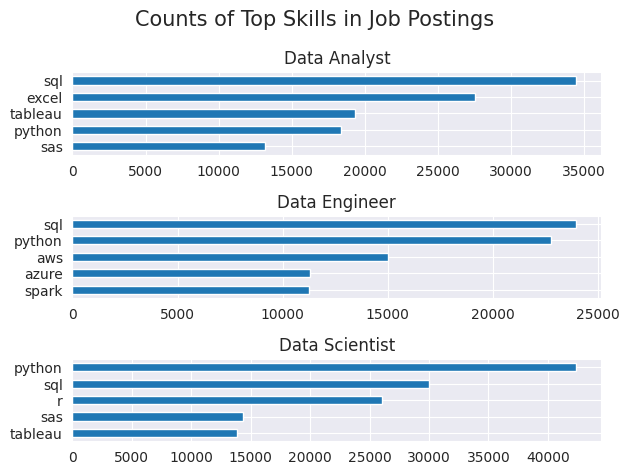

In [7]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', title=job_title, ax=ax[i])
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()
 

## **3. Converting skill counts into percentage**

In [8]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')  # Calculate the total jobs postings for data roles
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [12]:
df_skills_percentage = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')  # merge skill count with total jobs postings
df_skills_percentage

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,vue.js,Business Analyst,1,7382
1866,arch,Business Analyst,1,7382
1867,asana,Machine Learning Engineer,1,921
1868,no-sql,Machine Learning Engineer,1,921


In [13]:
df_skills_percentage['skill_percent'] = 100 * (df_skills_percentage['skill_count'] / df_skills_percentage['jobs_total'])  # adding skill_percent column
df_skills_percentage

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


## **4. Final Plotting**

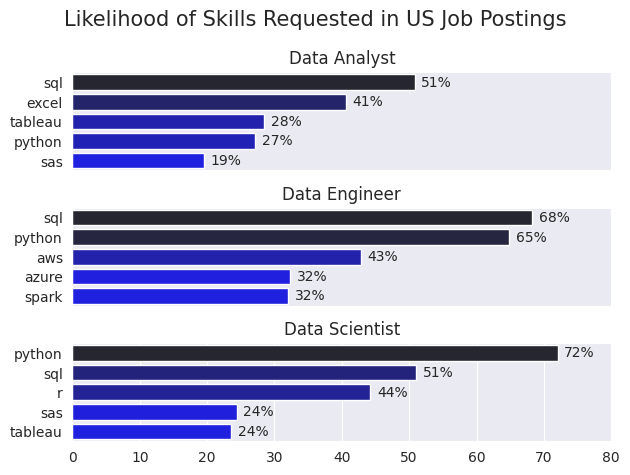

In [28]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percentage[df_skills_percentage['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')  # using seaborn for better visualization
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 80)
    
    # adding percentage value to the bars
    for j, value in enumerate(df_plot['skill_percent']):
        ax[i].text(value + 1, j, f'{value:.0f}%', va='center')
        
    # removing additional skill_percent representation
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout()
plt.show()